In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/user/Documents/data science/practice/WHO dataset/diabetes.csv")
df = pd.DataFrame(data)

In [3]:
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.shape

(768, 9)

In [6]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [7]:
X.shape

(768, 8)

In [8]:
y.shape

(768,)

In [9]:
df.shape

(768, 9)

In [10]:
dataset = np.zeros((768, 10))

In [11]:
dataset.shape

(768, 10)

In [12]:
dataset[:768, :9]= df

dataset[768:, -1] =1

In [13]:
dataset.shape

(768, 10)

In [14]:
dataset[:10]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01, 1.000e+00, 0.000e+00],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01, 0.000e+00, 0.000e+00],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01, 1.000e+00, 0.000e+00],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01, 1.000e+00, 0.000e+00],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01, 0.000e+00, 0.000e+00],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01, 1.000e+00, 0.000e+00],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01, 0.000e+

In [15]:
X_train = dataset[:154, :-1]
Y_train = dataset[:154, -1]

X_test = dataset[154:, :-1]
Y_test = dataset[154:, -1]


In [16]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [17]:
def hypothesis(X, theta):
    return sigmoid(np.dot(X,theta))

In [18]:
def cost(X,Y, theta):
    hx = hypothesis(X,theta)
    loss = np.mean( Y*np.log(hx) + (1-Y)*np.log(1-hx))
    
    return -1*loss

In [19]:
def gradient(X,Y, theta):
    y_p = hypothesis(X,theta)
    grad = np.dot(X.T, (Y - y_p))   
    return grad/X.shape[0]

In [48]:
def gradient_descent(X,Y):
    theta = np.zeros((X.shape[1],))
    
    max_epochs = 10000
    epoch_loss= []
    lr= 0.000003
    
    for i in range(max_epochs):
        grad= gradient(X,Y,theta)
        
        loss = cost(X,Y,theta)
        epoch_loss.append(loss)
        
        
        
        theta=theta + lr*grad
        
    
    return theta, epoch_loss

In [49]:
#train_X=X_train.values  
#train_Y=Y_train.values

In [50]:
ones = np.ones((X_train.shape[0],1)) 
train_X = np.hstack((ones, X_train))


In [51]:
theta,epoch_loss= gradient_descent(X_train,Y_train)

In [52]:
epoch_loss

[0.6931471805599453,
 0.6731370886655703,
 0.6540841215168748,
 0.6359381380575463,
 0.618650152432155,
 0.6021727125844815,
 0.5864601859884215,
 0.5714689597707371,
 0.5571575657109152,
 0.5434867420964934,
 0.5304194445651178,
 0.5179208173050232,
 0.505958134695463,
 0.49450072194617173,
 0.483519861748322,
 0.472988692507491,
 0.4628821024594927,
 0.4531766228975402,
 0.4438503228621149,
 0.43488270694612147,
 0.426254617323546,
 0.4179481406943091,
 0.4099465205270264,
 0.40223407475335704,
 0.3947961189042352,
 0.38761889456447995,
 0.3806895029459731,
 0.37399584333125324,
 0.3675265561115923,
 0.36127097013071324,
 0.3552190540429655,
 0.3493613713997503,
 0.3436890391878781,
 0.3381936895565591,
 0.3328674344845877,
 0.3277028331550479,
 0.322692861820885,
 0.31783088596050335,
 0.31311063453784954,
 0.3085261761960424,
 0.3040718972273837,
 0.2997424811754777,
 0.2955328899371815,
 0.29143834624320797,
 0.28745431740643884,
 0.2835765002364165,
 0.279800807027111,
 0.2761233

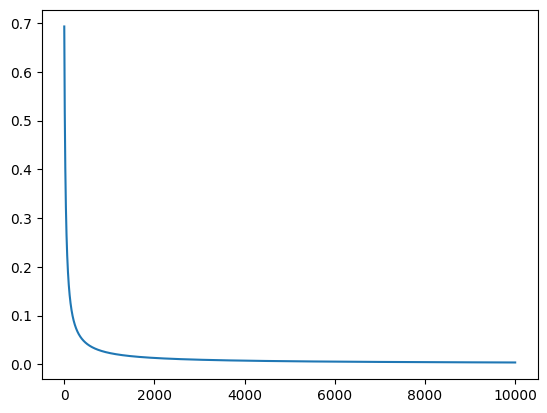

In [53]:
plt.plot(epoch_loss)

In [54]:
def accuracy(X_test, Y_test, theta):
    preds = hypothesis(X_test, theta)
    count = 0
    y_p =[]
    for i in range(len(preds)):
        if preds[i]> 0.5:
            y_p.append(1)
        else:
            y_p.append(0)
            
    
    for i in range (len(preds)):
        if y_p[i] == Y_test[i]:
            count +=1
        else:
            pass
    return count/len(y_p)

In [55]:
acc = accuracy(X_test,Y_test, theta)

In [56]:
print(acc)


1.0
